In [39]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [6]:
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    return X, y

In [10]:
X, y = get_dataset()
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [11]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.474755,0.401655,1.680818,2.889407,0.917045,-3.079506,4.399612,0.724643,-4.865636,-6.063381,-1.222099,-0.469962,1.012227,-0.689936,-0.530006,6.869668,-3.272111,-6.590441,-2.212906,-3.139579
1,0.848025,2.818419,-2.760087,-3.315206,0.149164,-1.810581,3.027528,0.111998,-0.728644,-9.393979,-2.374929,2.776886,3.357332,4.769087,-3.028062,11.641721,-3.442987,3.008445,0.786620,-1.276816
2,-1.900412,-0.569018,-1.762202,-0.583895,0.359125,-1.251286,-0.856250,1.546021,4.521895,-0.037934,1.227937,1.208501,1.890260,-2.132713,-1.752718,1.183493,9.564916,3.373364,-2.286137,1.903450
3,-1.012404,-1.482081,-0.968549,2.103057,-0.672274,-1.254941,1.951717,-1.463761,-0.489665,3.993727,-2.458270,0.843014,-0.113367,0.924460,-1.997302,8.844432,0.361584,-1.362227,0.123589,-2.264182
4,-0.189057,-3.512168,1.848276,-0.379249,0.359913,-2.542865,2.840213,-2.299910,0.016949,1.894389,1.776891,-1.883850,1.690899,0.024902,1.813630,5.517626,-5.424820,-3.775083,3.095232,-0.767354


In [13]:
y.tail()

,0
995,1
996,1
997,0
998,0
999,1


In [15]:
def get_models():
    models = {
        'lr' : LogisticRegression(),
        'knn' : KNeighborsClassifier(),
        'cart' : DecisionTreeClassifier(),
        'svm' : SVC(),
        'bayes' : GaussianNB()
    }
    return models

In [25]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv = cv, n_jobs=-1, error_score='raise')
    return scores

In [26]:
X, y = get_dataset()

In [27]:
models = get_models()

In [28]:
results, names = [], []

In [35]:
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.827 (0.051)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)


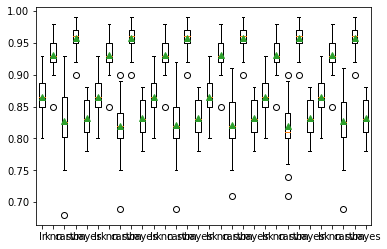

In [40]:
plt.boxplot(results, labels = names, showmeans=True)
plt.show()

In [41]:
from sklearn.ensemble import StackingClassifier

In [42]:
def get_stacking():
    level0 = []
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    
    level1 = LogisticRegression()
    
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv = 5)
    return model
    

In [44]:
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

In [45]:
X, y = get_dataset()

In [46]:
models = get_models()

In [47]:
results, names = [], []

In [48]:
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('> %s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

> lr 0.866 (0.029)
> knn 0.931 (0.025)
> cart 0.827 (0.042)
> svm 0.957 (0.020)
> bayes 0.833 (0.031)
> stacking 0.964 (0.020)


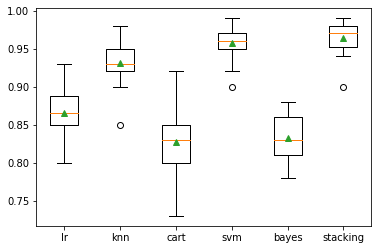

In [50]:
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [51]:
# custom model with predictions
def get_stacked_model(X, y):
    level0 = [
        ('lr', LogisticRegression()),
        ('knn', KNeighborsClassifier()),
        ('cart', DecisionTreeClassifier()),
        ('svm', SVC()),
        ('bayes', GaussianNB())
    ]
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv = 5)
    model.fit(X, y)
    return model

In [52]:
X, y = get_dataset()
model = get_stacked_model(X, y)

In [53]:
X.shape

(1000, 20)

In [57]:
vals = [np.random.randn(20)]

In [59]:
yhat = model.predict(vals)

In [60]:
print(yhat)

[1]


In [66]:
def try_different_input(model):
    for i in range(30):
        X = [np.random.randn(20)]
        yhat = model.predict(X)
        print(yhat)

In [67]:
try_different_input(model)

[0]
[1]
[0]
[0]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[1]
[1]
[0]
[0]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[0]
[0]
